# Pulso cadríaco

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

+ El conjunto de Age, Gender, Pulse, en el archivo Body-Data.xlsx, lista los pulsos cardiacos de una muestra de 300 hombres y  mujeres.
    + Existen métodos estadísticos importantes que se pueden utilizar para probar diferencias de manera formal (en este caso entre hombres y mujeres), 
    + pero por ahora exploraremos los datos para ver qué información podemos obtener. 
        + (Incluso si ya sabemos aplicar estos métodos estadísticos formales, es mejor explorar primero los datos antes de realizar el análisis formal).

### Consulta Inicial
Está bien documentado que existen diferencias fisiológicas importantes entre hombres y mujeres. Los hombres tienden a pesar más y a ser más altos que las mujeres. 
+ ¿Pero existe una diferencia en los pulsos cardiacos de hombres y mujeres? 

+ Primero hay una exploración con analisis preliminar y primera conclusión.
+ Luego un analisis avanzado con Medidas de Tendencia Central, Medicas de Variación, Cuartiles, Regla de 68, 95, 99.7 (1S, 2S, 3S), Mínimos y Máximos
1. Construcción de un dataframe con los estadísticos de describe() tendencia central y dispersión.
2. Construcción de un dataframe con los estadísticos de dos desvíaciones estandar (2S = 95% de los datos en normal)
3. Construcción de un dataframe con los valores de las puntas de bigotes o whiskers y los outliers
4. Calculo de cantidades de observaciones dentro de boxes y fuera de los mismos
5. Construcción de un dataframe con 1, 2 y 3.
5. Ordenamiento de las columnas para analizar. 

### Exploración de datos

In [3]:
# Leer el archivo Excel saltando la primera fila
xlsx = pd.ExcelFile("../../data/Body-Data.xlsx")

# Evitar primera fila y sus encabezados porque están las columnas combinadas.
df = pd.read_excel(xlsx, usecols=[0,1,2])
df.describe()

,AGE,GENDER (1=M),PULSE
count,300.000000,300.000000,300.000000
mean,47.040000,0.510000,71.766667
std,18.269583,0.500735,12.128033
min,18.000000,0.000000,36.000000
25%,31.000000,0.000000,64.000000
50%,46.000000,1.000000,72.000000
75%,62.000000,1.000000,80.000000
max,80.000000,1.000000,104.000000


+ Descripción para hombres y mujes
    + Son 300 observaciones en total
        + medias: edad 47 y pulsaciones 71,7
        + medianas: edad 76 y 72
        + minimos: edad 18 y pulsaciones 36
        + maximos: edad 80 y pulsaciones 104

### Exploración de datos por género

In [4]:

dfStats =df.groupby('GENDER (1=M)').describe(percentiles=[0.25, 0.5, 0.75])
dfStats

AGE                                                      \
              count       mean        std   min   25%   50%   75%   max   
GENDER (1=M)                                                              
0             147.0  46.666667  17.663263  18.0  33.0  45.0  60.5  80.0   
1             153.0  47.398693  18.884810  18.0  30.0  46.0  62.0  80.0   

              PULSE                                                       
              count       mean        std   min   25%   50%   75%    max  
GENDER (1=M)                                                              
0             147.0  74.040816  12.543556  36.0  64.0  74.0  82.0  104.0  
1             153.0  69.581699  11.331497  40.0  62.0  68.0  76.0  104.0

+ Hay mas hombres que mujeres (1>0 => male > female):   HOMBRES) 153    MUJERES) 147
+ Analisis de las pulsaciones:
        + Las medias y las desviaciones son mayores para las mujeres que para los hombres.
    + Desviaciones:
        + Como las desviaciones en los hombres son mayores los percentiles están ubicados a valores maores.
    + Máximos y mínimos:
        + Los maximos son iguales para mujeres y hombres.
        + Los mínimos son menores para mujeres.

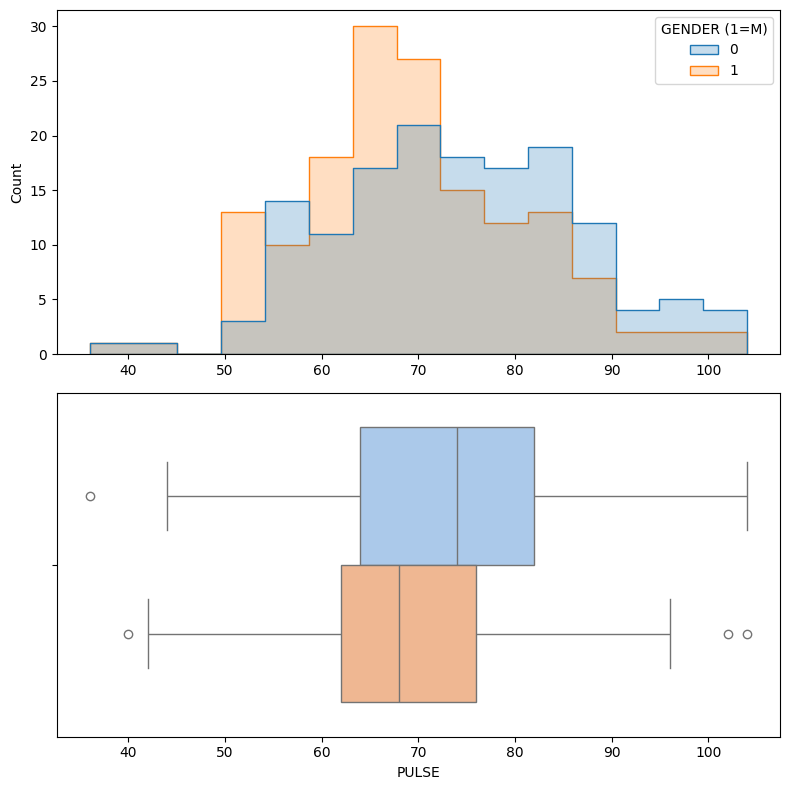

In [5]:
plt.figure(figsize=(8, 8))
ax1 = plt.subplot(211)
sns.histplot(df, x='PULSE', hue='GENDER (1=M)', element='step')
plt.xlabel('')
    
ax2 = plt.subplot(212)
sns.boxplot(df, x='PULSE', hue='GENDER (1=M)', palette='pastel', legend=False)

# Alinear los ejes x
ax2.set_xlim(ax1.get_xlim())

# Ajustar el diseño
plt.tight_layout()
plt.show()

Del histrograma se observa que si bien la media y mediana de los hombres es más baja:
1. Para pulsaciones bajas entre 35 45 hombres y mujeres tienen las mismas pulsaciones.
2. Para pulsaciones entre 50 y 73 las pulsaciones de los hombres es mayor.
3. Para pulsaciones mayores a 75 se observa un mayor ritmo cardíaco de las mujeres.
4. Las pulsaciones de los hombres están mas concentradas, por eso muestran outliers

### Ouliers

#### Aproximaciones por regla de 68, 95, 99.7
Para ver las pulsaciones que se desvían mucho y tienden a hacerse outliers se observan primero en dónde están el 95% de las pulsaciones.
+ Y el 95% de las pulsaciones (para una distribución aproximadamente normal está a una distancia de 2S)
+ Por lo tanto las pulsacinoes que están por encima y por debajo de X+-2S pueden considerarse outliers

In [6]:
# Calculo dos desviaciones estandar para mujeres y para hombres: 2S
# Armo un dataframe con los valores mínimos y maximos de media +- 2S
df95= pd.DataFrame( {
    "mean-2S": dfStats.loc[0:,('PULSE','mean')] - dfStats.loc[0:,('PULSE','std')]*2,
    "mean"   : dfStats.loc[0:,('PULSE','mean')],
    "mean+2S": dfStats.loc[0:,('PULSE','std')]*2 + dfStats.loc[0:,('PULSE','mean')]
})
df95


,mean-2S,mean,mean+2S
GENDER (1=M),,,
0,48.953705,74.040816,99.127928
1,46.918706,69.581699,92.244693


In [7]:
# Calculo los valores que están fuera del 95% de las observaciones para damas
# mayores a mean+2s y menores a mean-2s
print(df[(df['GENDER (1=M)'] == 0) & (df['PULSE'] > 99)])
print(df[(df['GENDER (1=M)'] == 0) & (df['PULSE'] < 48.9)])


     AGE  GENDER (1=M)  PULSE
64    80             0    100
90    68             0    104
123   18             0    104
202   18             0    100
     AGE  GENDER (1=M)  PULSE
24    46             0     36
157   29             0     44


Para mujeres:
+ Se encuentran 4 valores que están fuera del 95% de las observaciones por encima.
+ Se observan 2 valores que están fuera del 95% de las observaciones por debajo.
+ Se observan 4 valores por encima y 2 valores por debajo.
+ Son un 6 valores sobre 147.

In [8]:
# Calculo los valores fuera del 95% de las observaciones para hombres
# mayores a mean+2s y menores a mean-2s
print(df[(df['GENDER (1=M)'] == 1) & (df['PULSE'] > 92.2)])
print(df[(df['GENDER (1=M)'] == 1) & (df['PULSE'] < 46.9)])

     AGE  GENDER (1=M)  PULSE
35    74             1     96
69    36             1     96
113   30             1    104
204   54             1    102
295   24             1     94
     AGE  GENDER (1=M)  PULSE
40    80             1     42
139   38             1     40


Para hombres:
+ Se encuentran 5 valores que están fuera del 95% de las observaciones por encima.
+ Se observan 2 valores que están fuera del 95% de las observaciones por debajo.
+ Se observan 5 valores por encima y 2 valores por debajo.
+ Son un 7 valores sobre 153.

### Conlusiones y respuesta
Es claro que existen diferencias entre los pulsos cardíacos de hombres y mujeres.
+ En general las mujeres tienen un pulso más acelerado que los hombres. (con una menor dispersión
+ Estas diferencias ya están explicadas mas arriba.

# Tabla de estadísticos

Medidas de Tendencia Central, Medicas de Variación, Cuartiles, Regla de 68, 95, 99.7 (1S, 2S, 3S), Mínimos y Máximos
1. Construcción de un dataframe con los estadísticos de describe() tendencia central y dispersión.
2. Construcción de un dataframe con los estadísticos de dos desvíaciones estandar (2S = 95% de los datos en normal)
3. Construcción de un dataframe con los valores de las puntas de bigotes o whiskers y los outliers
4. Calculo de cantidades de observaciones dentro de boxes y fuera de los mismos
5. Construcción de un dataframe con 1, 2 y 3.
5. Ordenamiento de las columnas para analizar. 

In [76]:
# 1. Construcción de un dataframe con los estadísticos de describe()
    # Elijo la parte del dataframe que me interesa (genero y pulso)
    # Extraigo los estadísticos de tendencia central y variación (describe())
dfstats = df[['GENDER (1=M)','PULSE']].groupby('GENDER (1=M)').describe()
    # Elimino el indice múltiple. Eliminando el nivel 1 'PULSE'
dfstats.columns = dfstats.columns.droplevel(level=0)

# 2. Construcción de dataframe con dos desviaciones estandard
    # Mientras armo el dataframe calculo las desviaciones para 0 (mujeres) y 1 (hombres)
df95 = pd.DataFrame (
    {
        "mean-2S": [dfstats.loc[0, 'mean'] - dfstats.loc[0, 'std'] * 2, dfstats.loc[1, 'mean'] - dfstats.loc[1, 'std'] * 2],
        "mean+2S": [dfstats.loc[0, 'mean'] + dfstats.loc[0, 'std'] * 2, dfstats.loc[1, 'mean'] + dfstats.loc[1, 'std'] * 2]
    },
    index = [0, 1]
)

# 3. Construcción de un dataframe con los cuartiles y valores de las puntas de bigotes o whiskers
    # Calculo cuartiles y whiskers. Para aprender otra variante a describe() utilizo quantile()
    # a. females
Q1_0 = df[df['GENDER (1=M)'] == 0]['PULSE'].quantile(0.25) # debe coincider con 25% de df.describe()
Q2_0 = df[df['GENDER (1=M)'] == 0]['PULSE'].quantile(0.5)  # debe coincider con 50% de df.describe()
Q3_0 = df[df['GENDER (1=M)'] == 0]['PULSE'].quantile(0.75) # debe coincider con 75% de df.describe()
IQR_0 = Q3_0 - Q1_0

whisker_min_0 = df[df['GENDER (1=M)'] == 0]['PULSE'][df['PULSE'] >= Q1_0 - 1.5 * IQR_0].min()
whisker_max_0 = df[df['GENDER (1=M)'] == 0]['PULSE'][df['PULSE'] <= Q3_0 + 1.5 * IQR_0].max()

    # Calculo cuartiles y whiskers. Para aprender otra variante a describe() utilizo quantile()
    # b. males
Q1_1 = df[df['GENDER (1=M)'] == 1]['PULSE'].quantile(0.25) # debe coincider con 25% de df.describe()
Q2_1 = df[df['GENDER (1=M)'] == 1]['PULSE'].quantile(0.5)  # debe coincider con 50% de df.describe()
Q3_1 = df[df['GENDER (1=M)'] == 1]['PULSE'].quantile(0.75) # debe coincider con 75% de df.describe()
IQR_1 = Q3_1 - Q1_1

whisker_min_1 = df[df['GENDER (1=M)'] == 1]['PULSE'][df['PULSE'] >= Q1_1 - 1.5 * IQR_1].min()
whisker_max_1 = df[df['GENDER (1=M)'] == 1]['PULSE'][df['PULSE'] <= Q3_1 + 1.5 * IQR_1].max()

    # Calculo de Outliers
    # c. Los outliers son los que están por afuera de los whiskers 0 y 1 entonces
outliers_0 = df[df['GENDER (1=M)'] == 0]['PULSE'][(df['PULSE'] < whisker_min_0) | (df['PULSE'] > whisker_max_0)]
outliers_1 = df[df['GENDER (1=M)'] == 1]['PULSE'][(df['PULSE'] < whisker_min_1) | (df['PULSE'] > whisker_max_1)]

    # Armo resumen.
    # d. un dataframe con las puntas de bigotes o whiskers y outliers
dfwhiskers = pd.DataFrame(
    {
        "whisker_min" : [whisker_min_0, whisker_min_1],
        "whisker_max" : [whisker_max_0, whisker_max_1],
    },
    index=[0,1]
)

# 4. Calculo de cantidades de observaciones dentro de boxes y fuera de los mismos
    # a. Cantidades dentro de los boxes
box_0 = df[df['GENDER (1=M)'] == 0]['PULSE'][(df['PULSE'] >= Q1_0) & (df['PULSE'] <= Q3_0)].count()
box_1 = df[df['GENDER (1=M)'] == 1]['PULSE'][(df['PULSE'] >= Q1_1) & (df['PULSE'] <= Q3_1)].count()

    # b. Cantidades dentro de whiskers (incluye boxes)
wisk_0 = df[df['GENDER (1=M)'] == 0]['PULSE'][(df['PULSE'] >= whisker_min_0) & (df['PULSE'] <= whisker_max_0)].count()
wisk_1 = df[df['GENDER (1=M)'] == 1]['PULSE'][(df['PULSE'] >= whisker_min_1) & (df['PULSE'] <= whisker_max_1)].count()

    # c. Cantidades entre whiskers y boxes
wis_box_0 = wisk_0 - box_0
wis_box_1 = wisk_1 - box_1

    # Resumen cantidades
df_count = pd.DataFrame(
    {
        "qBox" : [box_0, box_1],
        "qW-qB" : [wis_box_0, wis_box_1],
        "qWhiskers" : [wisk_0, wisk_1],
        "qOutliers" : [outliers_0.count(),outliers_1.count()],
        "qTotal" : [box_0 + wis_box_0 + outliers_0.count(), box_1 + wis_box_1 + outliers_1.count()]
    }, index=['0', '1']
)

# 5. Construcción de un dataframe con 1, 2 y 3.
    # Concatenación de estadísticos paa 0 y 1
df_concatenado = pd.concat([dfstats, df95, dfwhiskers], axis=1)

# Ordenamiento de Estadísticos dentro del DataFrame
df_combined = df_concatenado[['count', 'mean-2S', 'mean', 'std', 'mean+2S', 'min', 'whisker_min', '25%', '50%', '75%', 'whisker_max', 'max']]
df_combined

,count,mean-2S,mean,std,mean+2S,min,whisker_min,25%,50%,75%,whisker_max,max
0,147.0,48.953705,74.040816,12.543556,99.127928,36.0,44,64.0,74.0,82.0,104,104.0
1,153.0,46.918706,69.581699,11.331497,92.244693,40.0,42,62.0,68.0,76.0,96,104.0


In [77]:
df_count

,qBox,qW-qB,qWhiskers,qOutliers,qTotal
0,84,62,146,1,147
1,83,67,150,3,153


________________________________________________________________________________________________________________________________